In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_tratado.csv', sep=',')
df.head()

,Unnamed: 0,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,latitude,longitude,regional,delegacia,uop,origem_arquivo,dia,mes,ano,grave
0,1,405158.0,2022-01-01,Sábado,02:40:00,PR,116,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,...,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,1,1,2022,1
1,28,405442.0,2022-02-01,Domingo,12:00:00,SC,116,54.0,PAPANDUVA,Velocidade Incompatível,...,"-26,39448417","-50,16480003",SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,1,2,2022,0
2,34,405542.0,2022-02-01,Domingo,18:40:00,RS,290,112.0,ELDORADO DO SUL,Acessar a via sem observar a presença dos outr...,...,"-30,040455","-51,329193",SPRF-RS,DEL02-RS,UOP01-DEL02-RS,datatran2022.csv,1,2,2022,0
3,36,405558.0,2022-02-01,Domingo,23:00:00,SC,101,118.0,ITAJAI,Ingestão de álcool pelo condutor,...,"-26,895859","-48,71903",SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,1,2,2022,0
4,38,405589.0,2022-03-01,Segunda,03:30:00,SC,101,329.0,CAPIVARI DE BAIXO,Ingestão de álcool pelo condutor,...,"-28,45039264","-48,97180974",SPRF-SC,DEL02-SC,UOP01-DEL02-SC,datatran2022.csv,1,3,2022,0


In [3]:
#features = ['dia_semana','br','km','fase_dia','sentido_via','condicao_metereologica','tipo_pista','pessoas','feridos_leves','feridos_graves','ilesos','veiculos','dia','mes']
features = ['dia_semana','br','km','fase_dia','sentido_via','condicao_metereologica','tipo_pista','veiculos']
X = df[features]
y = df['grave']

In [4]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

C:\Users\adria\AppData\Local\Temp\ipykernel_15668\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_15668\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_15668\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [5]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Criar e treinar o modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

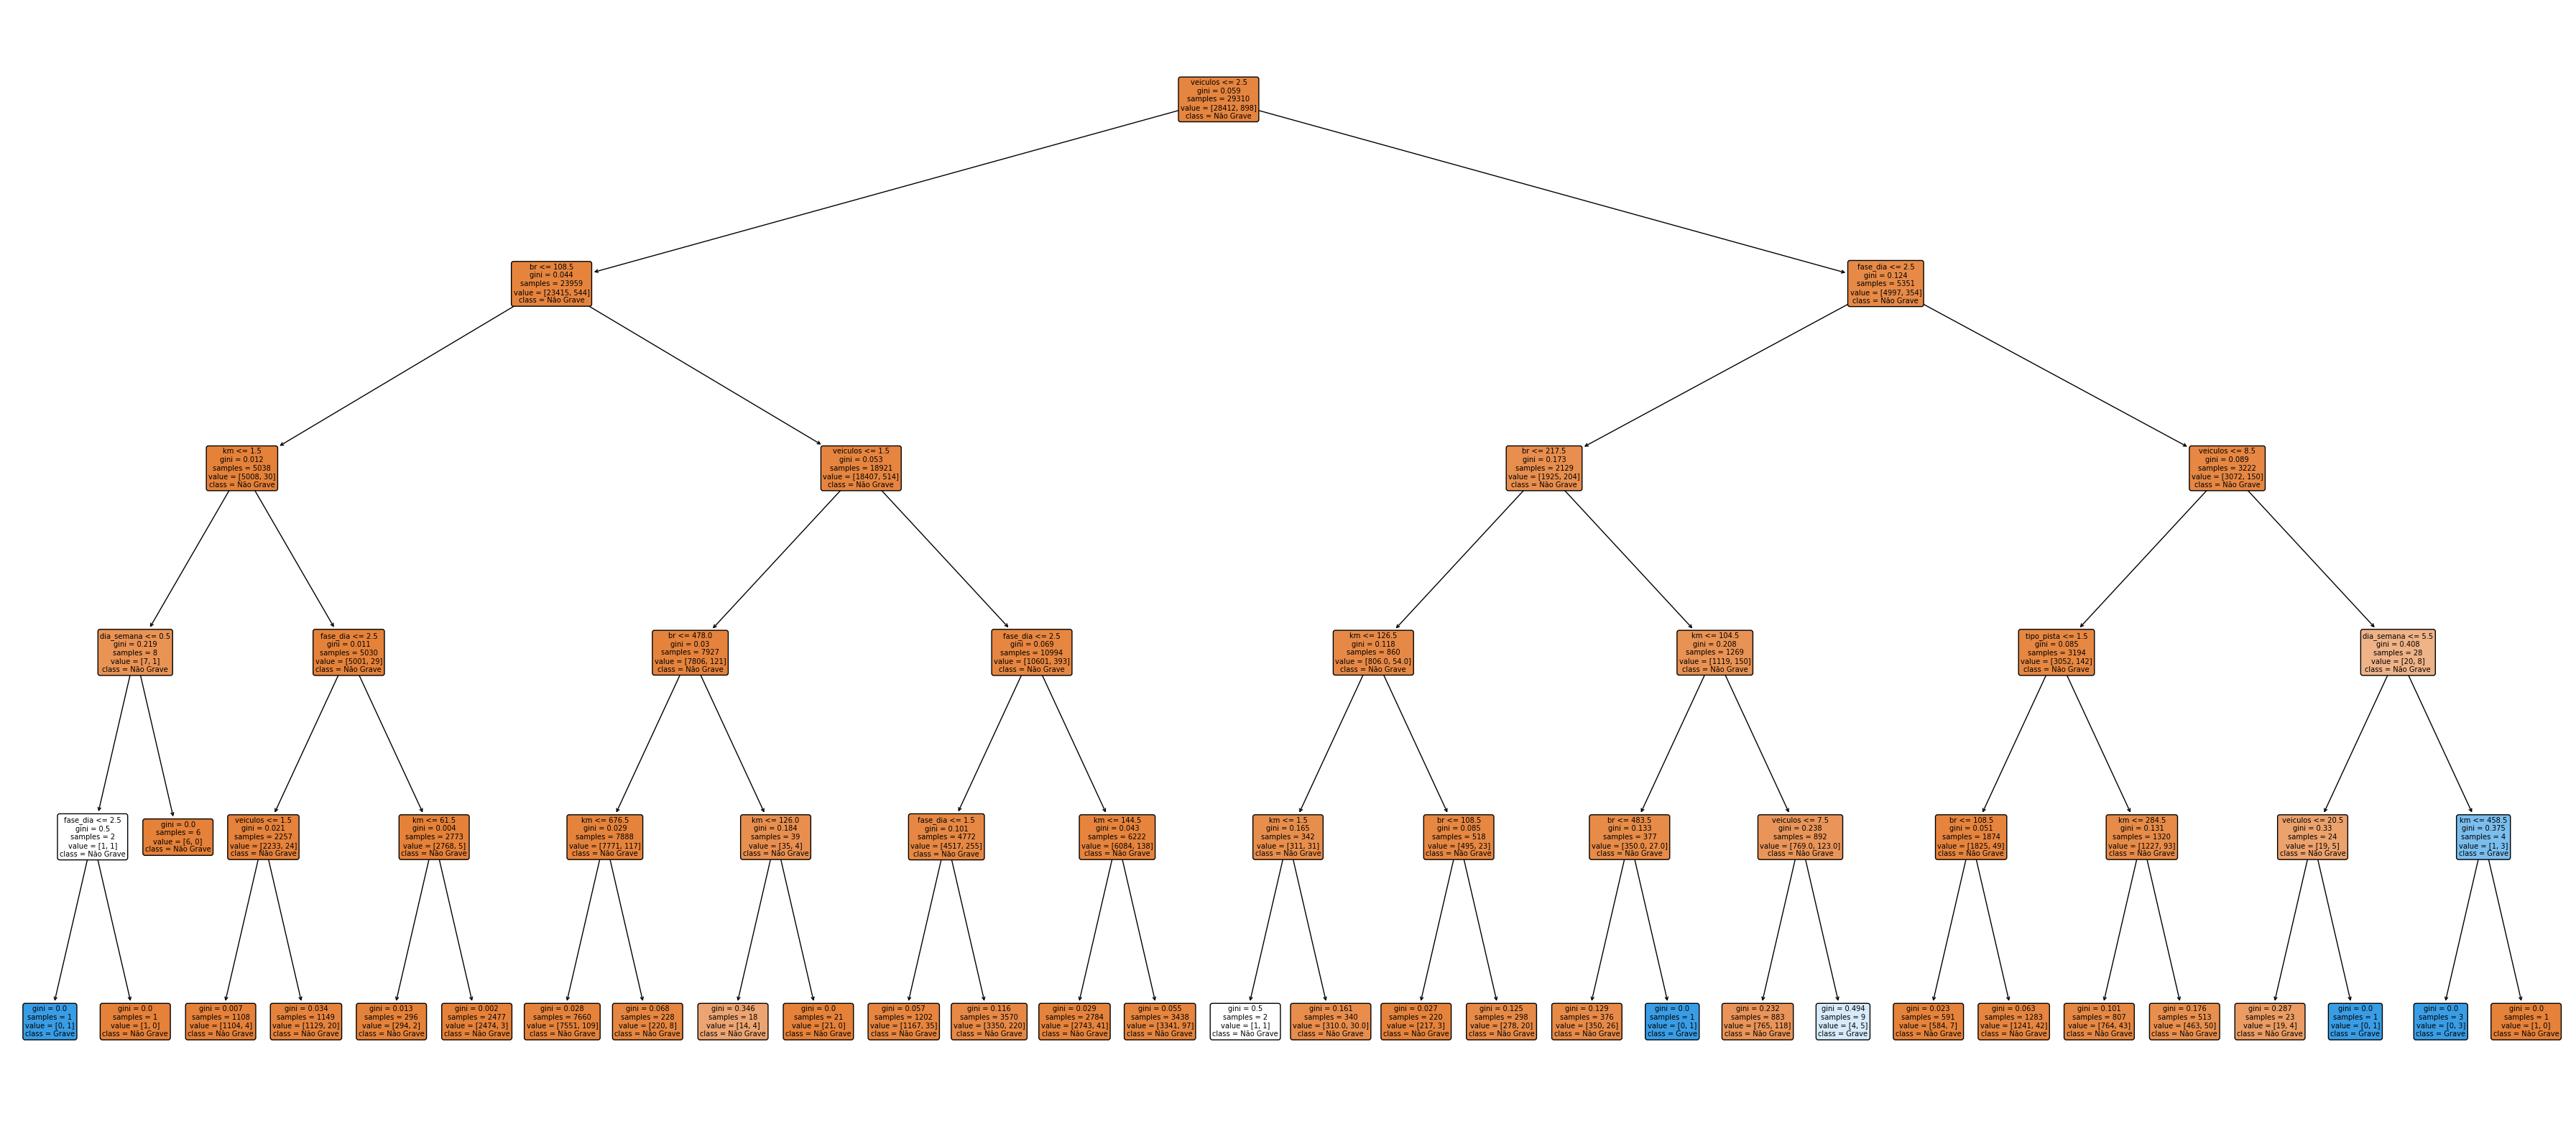

In [7]:
# Visualização gráfica da árvore
plt.figure(figsize=(46, 20))
plot_tree(clf, feature_names=features, class_names=['Não Grave', 'Grave'], filled=True, rounded=True)
plt.show()

In [8]:
importances = clf.feature_importances_

# Criar DataFrame para visualizar
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                  feature  importance
7                veiculos    0.420011
3                fase_dia    0.216549
1                      br    0.150321
2                      km    0.127020
6              tipo_pista    0.045119
0              dia_semana    0.040981
4             sentido_via    0.000000
5  condicao_metereologica    0.000000


In [9]:
# Exibir regras da árvore em texto
tree_rules = export_text(clf, feature_names=features)
print("\n📜 Regras da Árvore de Decisão:\n")
print(tree_rules)


📜 Regras da Árvore de Decisão:

|--- veiculos <= 2.50
|   |--- br <= 108.50
|   |   |--- km <= 1.50
|   |   |   |--- dia_semana <= 0.50
|   |   |   |   |--- fase_dia <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fase_dia >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- dia_semana >  0.50
|   |   |   |   |--- class: 0
|   |   |--- km >  1.50
|   |   |   |--- fase_dia <= 2.50
|   |   |   |   |--- veiculos <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- veiculos >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- fase_dia >  2.50
|   |   |   |   |--- km <= 61.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- km >  61.50
|   |   |   |   |   |--- class: 0
|   |--- br >  108.50
|   |   |--- veiculos <= 1.50
|   |   |   |--- br <= 478.00
|   |   |   |   |--- km <= 676.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- km >  676.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- br >  478.00
|   |   |   |   |--- km <= 126.00
|